
Homework: Least Action using Minimization
Use function "minimize from scipy.optimize" and the method called ‘SLSQP’ to minimize: the action S.

This task is basically identical to the example from the class. Use the same parameters (t=3.0,m=0.2 n=21) and both functions: xfit() and S().

For more details on the scipy.optimize.minimize read the documentation:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html

Please note that the output of this function is different that from the "optimize.fmin_powell" that we did in the class

here: obj = scipy.optimize.minimize(...)
the output of the process is an object (obj) so to access the information of the minimization you can type:

print(obj), or print(dir(obj))
look at the attributes (x, success, status, message, fun)
then choose the attribute you are interested in, example:
print(obj.message)

details on the attributes are here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.OptimizeResult.html#scipy.optimize.OptimizeResult)

compare by plotting the two minimization routines, the one from the class "optimize.fmin_powell" with "scipy.optimize.minimize"

In [8]:
#Solución

Problem: Let an object of mass $m=0.2$ Kg be thrown vertically updward and returning back to the same hand after 3 s. Find the function of distance versus time of least Action.

If we denote the height at time $t_i$ as $x_i=x(t_i)$, we can calculate the action for any set of $x_i$ points with the inititial and final points fixed at $0\ $m.

In other words, what is the $x(t)$ that minimizes $S$

In [46]:
import scipy
from scipy import optimize
from scipy import interpolate
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt

**With optimize.fmin_powell**

In [40]:
#From class:

def S(x,tend=3.,m=0.2,xini=0.,xend=0.):
    x=np.asarray(x)
    Dt=tend/x[:-1].size
    #Fix initial and final point
    x[0]=xini
    x[-1]=xend
    return ( (0.5*m*(x[1:]-x[:-1])**2/Dt**2-0.5*m*g*(x[1:]+x[:-1]) )*Dt).sum()

In [41]:
def xfit(n,t=3.,m=0.2,xini=0.,xend=0.,ftol=1E-8):
    
    t=float(t)
    if n%2==0:
        print ( 'x array must be odd')
        sys.exit()
    x0=np.zeros(n)
    a = optimize.fmin_powell(S,x0,args=(t,m,xini,xend),ftol=ftol,full_output=1) 
    x=a[0]
    x[0]=xini;x[-1]=xend
    xmax=np.sort(x)[-1]
    Smin=a[1]
    Dt=t/x[:-1].size #  t/(n-1)
    return x,xmax,Smin,Dt

In [42]:
t=3.0
m=0.2
g = 9.8
n=21
y=xfit(21,t,m)

#y=xfit(21)
print(y)

Optimization terminated successfully.
         Current function value: -21.554977
         Iterations: 28
         Function evaluations: 5837
(array([ 0.        ,  2.09485981,  3.96927762,  5.62312695,  7.05635241,
        8.26906363,  9.26154883, 10.03312026, 10.58423427, 10.91506033,
       11.02529045, 10.91501183, 10.58427987, 10.03303519,  9.26102159,
        8.26869546,  7.05596305,  5.62273064,  3.9689361 ,  2.09464162,
        0.        ]), 11.025290448185725, -21.55497732876534, 0.15)


In [56]:
x=y[0]
xmax=y[1]
Smin=y[2]
Dt=y[3]
tx=np.arange(0,t+Dt,Dt)
#print(Smin)

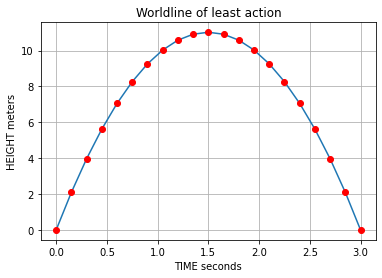

In [53]:
# plotting the results: of class

plt.plot(tx,x)
plt.plot(tx,x,'ro')
plt.ylabel('HEIGHT meters')
plt.xlabel('TIME seconds')
plt.title('Worldline of least action')
plt.grid()

**With scipy.optimize.minimize**

In [15]:
#Función
x0 = np.zeros(n)

ob =  minimize(S,x0,args=(t,m),method='SLSQP')
ob

     fun: -21.554977470134183
     jac: array([ 0.00000000e+00,  1.25169754e-04, -1.52587891e-05, -7.62939453e-06,
       -8.15391541e-05,  1.61170959e-04, -8.41617584e-05,  4.38690186e-05,
       -1.12056732e-05, -6.79492950e-05, -4.76837158e-07, -6.84261322e-05,
       -9.77516174e-06,  4.22000885e-05, -8.32080841e-05,  1.58071518e-04,
       -7.43865967e-05, -1.64508820e-05, -8.10623169e-06,  1.20639801e-04,
        0.00000000e+00])
 message: 'Optimization terminated successfully'
    nfev: 326
     nit: 14
    njev: 14
  status: 0
 success: True
       x: array([1.01451261e-15, 2.09479625e+00, 3.96899864e+00, 5.62271249e+00,
       7.05593218e+00, 8.26871297e+00, 9.26087282e+00, 1.00325958e+01,
       1.05837860e+01, 1.09144847e+01, 1.10247345e+01, 1.09144847e+01,
       1.05837862e+01, 1.00325952e+01, 9.26087246e+00, 8.26871223e+00,
       7.05593341e+00, 5.62271053e+00, 3.96899997e+00, 2.09479527e+00,
       0.00000000e+00])

In [59]:
#Some methods
print(type(ob))
print(ob.message) 
print(ob.x)

<class 'scipy.optimize.optimize.OptimizeResult'>
Optimization terminated successfully
[1.01451261e-15 2.09479625e+00 3.96899864e+00 5.62271249e+00
 7.05593218e+00 8.26871297e+00 9.26087282e+00 1.00325958e+01
 1.05837860e+01 1.09144847e+01 1.10247345e+01 1.09144847e+01
 1.05837862e+01 1.00325952e+01 9.26087246e+00 8.26871223e+00
 7.05593341e+00 5.62271053e+00 3.96899997e+00 2.09479527e+00
 0.00000000e+00]


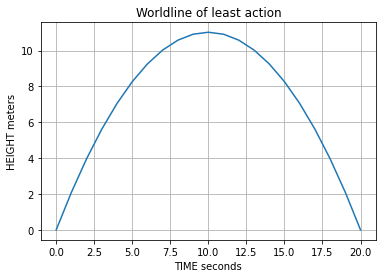

In [58]:
#Plotting the attribute "x" of the object.

plt.plot(ob.x)
plt.ylabel('HEIGHT meters')
plt.xlabel('TIME seconds')
plt.title('Worldline of least action')
plt.grid()